# Task 5 Exploratory Data Analysis - Sports 

Author - Shadab Ansari

Task - Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’. As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team. Suggest teams or players a company should endorse for its products.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [2]:
matches_data = pd.read_csv(r'F:\matches.csv')
deliveries_data = pd.read_csv(r'F:\deliveries.csv')

# Exploring the data

In [3]:
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches_data.shape

(756, 18)

In [5]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
matches_data['city'] = matches_data['city'].fillna(matches_data['city'].mode()[0])
matches_data['winner'] = matches_data['winner'].fillna(matches_data['winner'].mode()[0])
matches_data['player_of_match'] = matches_data['player_of_match'].fillna(matches_data['player_of_match'].mode()[0])
matches_data['umpire1'] = matches_data['umpire1'].fillna(matches_data['umpire1'].mode()[0])
matches_data['umpire2'] = matches_data['umpire2'].fillna(matches_data['umpire1'].mode()[0])

In [7]:
matches_data.drop(['umpire3'],axis=1,inplace=True)

In [8]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
dtypes: int64(5), object(12)
memory usag

In [9]:
matches_data.shape

(756, 17)

In [10]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [11]:
deliveries_data.shape

(179078, 21)

In [12]:
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [13]:
deliveries_data.drop(['player_dismissed'],axis=1,inplace=True)
deliveries_data.drop(['dismissal_kind'],axis=1,inplace=True)
deliveries_data.drop(['fielder'],axis=1,inplace=True)

In [14]:
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   match_id       179078 non-null  int64 
 1   inning         179078 non-null  int64 
 2   batting_team   179078 non-null  object
 3   bowling_team   179078 non-null  object
 4   over           179078 non-null  int64 
 5   ball           179078 non-null  int64 
 6   batsman        179078 non-null  object
 7   non_striker    179078 non-null  object
 8   bowler         179078 non-null  object
 9   is_super_over  179078 non-null  int64 
 10  wide_runs      179078 non-null  int64 
 11  bye_runs       179078 non-null  int64 
 12  legbye_runs    179078 non-null  int64 
 13  noball_runs    179078 non-null  int64 
 14  penalty_runs   179078 non-null  int64 
 15  batsman_runs   179078 non-null  int64 
 16  extra_runs     179078 non-null  int64 
 17  total_runs     179078 non-null  int64 
dtypes: i

In [15]:
deliveries_data.shape

(179078, 18)

# Data Visualization

# Number of Matches played in each IPL season

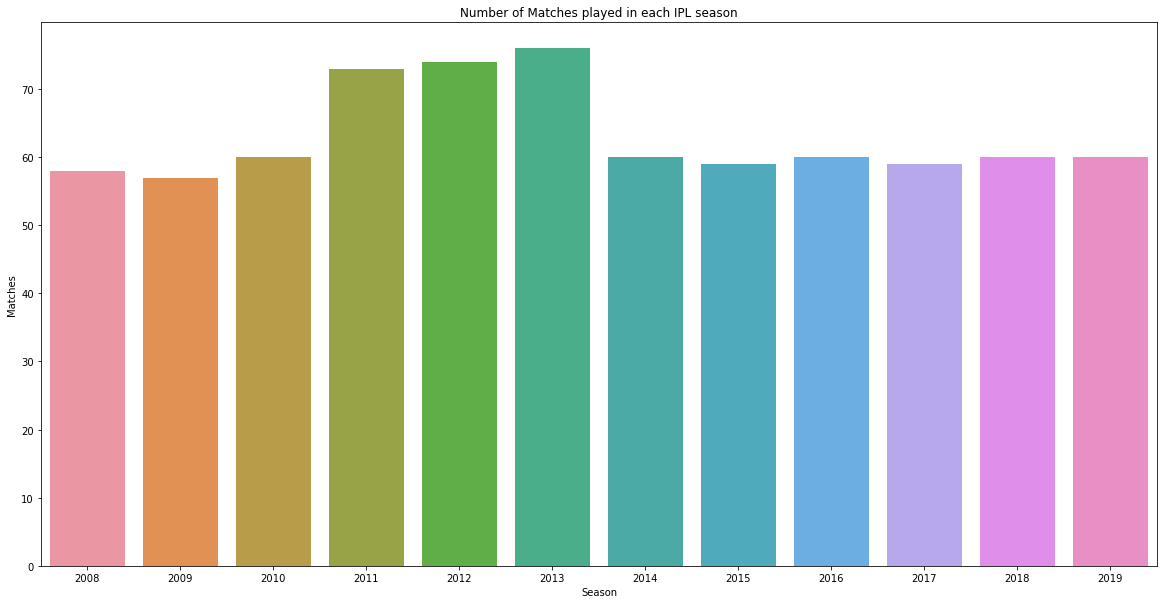

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(matches_data['season'])
plt.title('Number of Matches played in each IPL season')
plt.xlabel('Season')
plt.ylabel('Matches')
plt.show()

# Number of Matches won by teams

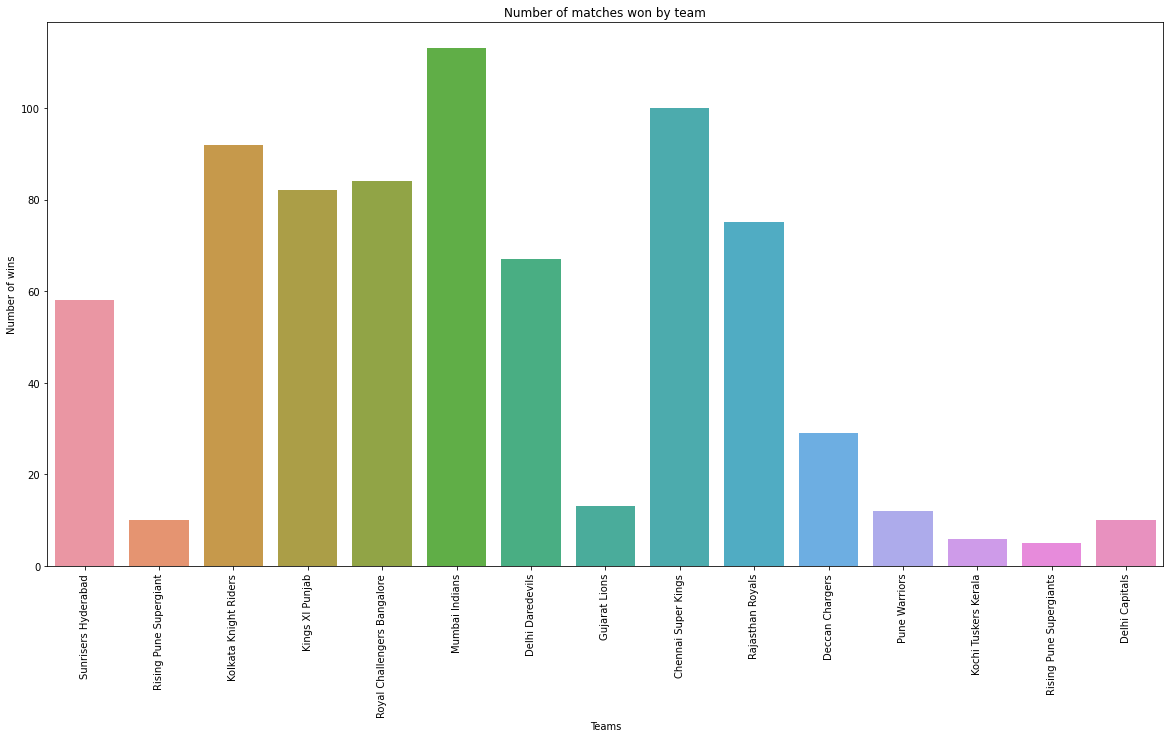

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x=matches_data['winner'])
plt.title('Number of matches won by team')
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Number of wins')
plt.show()

# Number of Batsman who scored Most Runs

<AxesSubplot:title={'center':'Most Run-Scoring Batsman'}, xlabel='batsman', ylabel='Total run scored'>

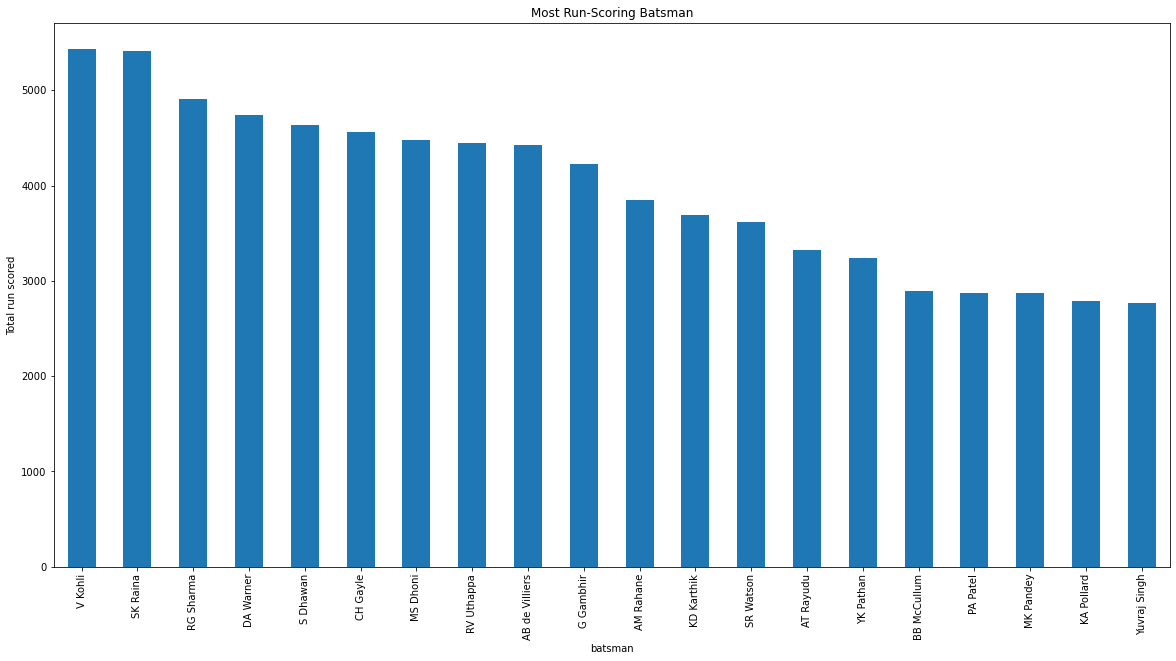

In [18]:
plt.figure(figsize=(20,10))
plt.title('Most Run-Scoring Batsman')
plt.ylabel('Total run scored')
deliveries_data.groupby('batsman').batsman_runs.sum().sort_values(ascending=False)[:20].plot(kind='bar')

# Most Number of Batsman who Became 'Man of the Match'

<AxesSubplot:title={'center':'Player of the Match Won'}>

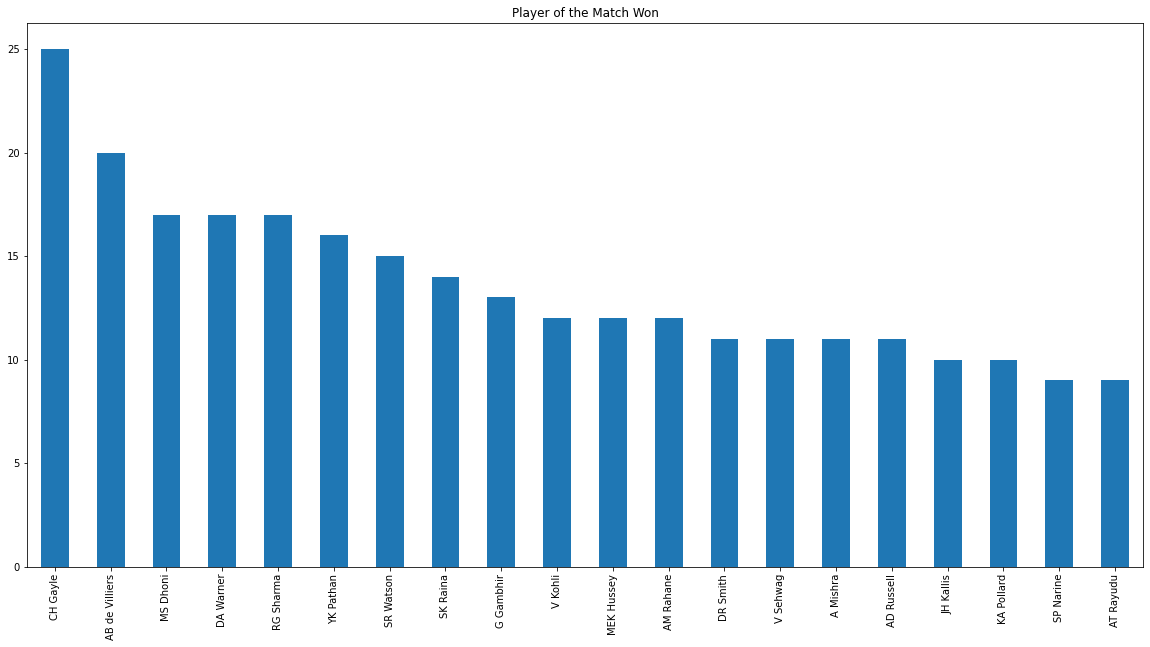

In [19]:
plt.figure(figsize=(20,10))
plt.title('Player of the Match Won')
matches_data.player_of_match.value_counts()[:20].plot(kind='bar')

# Number of Matches won by Toss Result

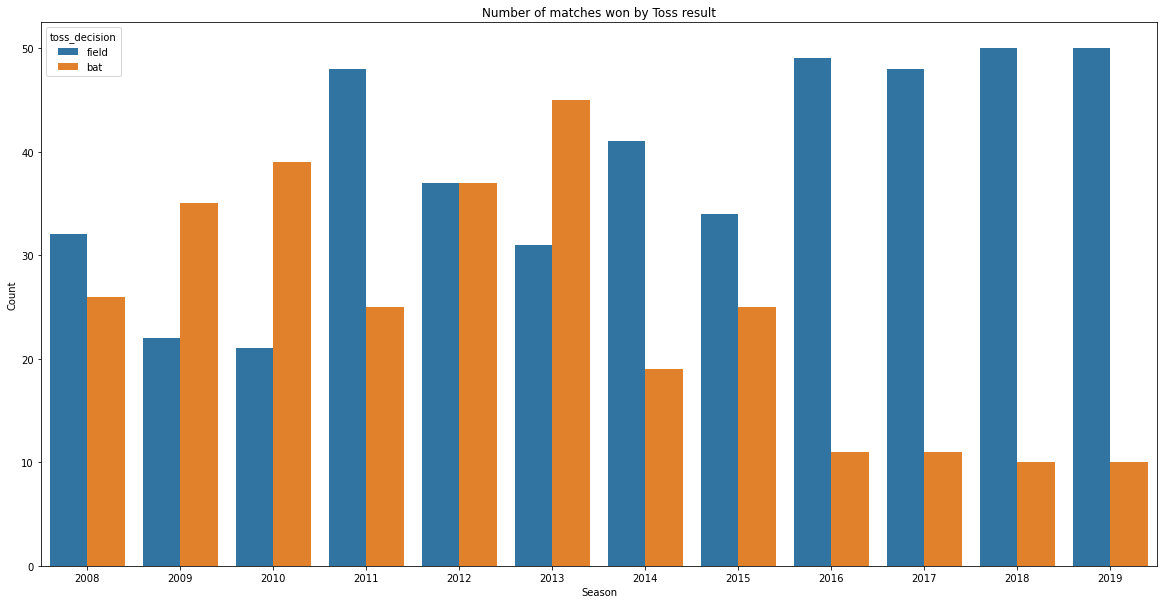

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(matches_data['season'], hue=matches_data['toss_decision'])
plt.title('Number of matches won by Toss result')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# Number of Fours hit by Batsman

<AxesSubplot:title={'center':'Number of fours hit'}, xlabel='batsman,total_runs'>

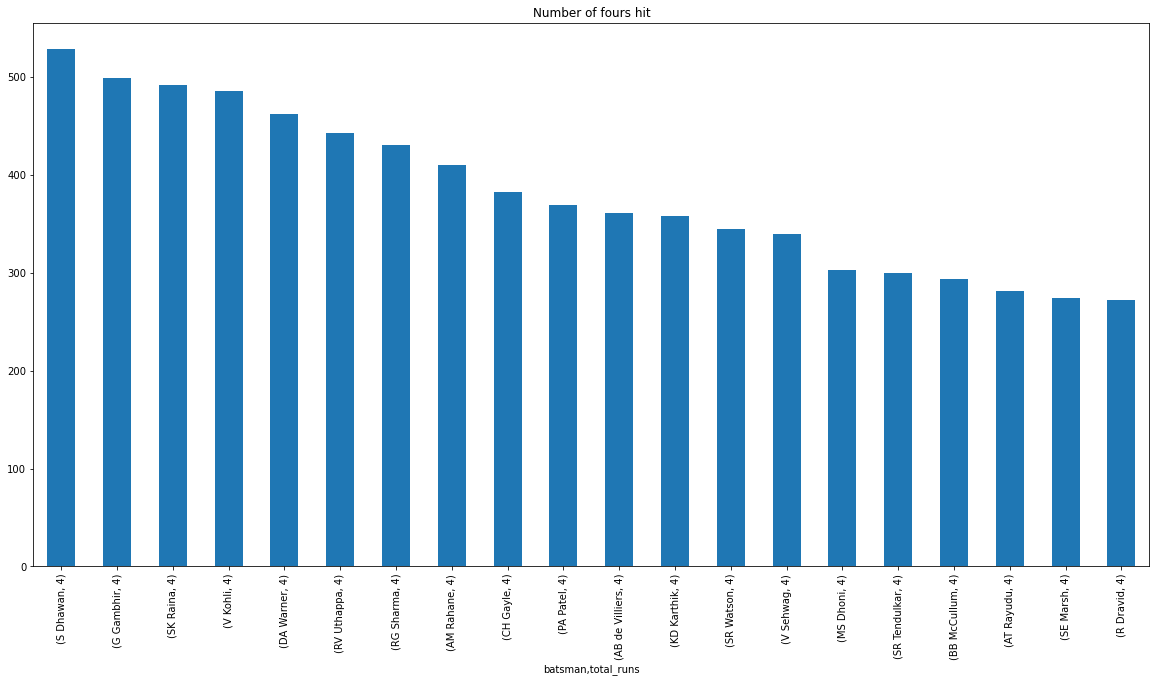

In [21]:
plt.figure(figsize=(20,10))
plt.title('Number of fours hit')
fours=deliveries_data[deliveries_data.total_runs==4].groupby('batsman')
fours.total_runs.value_counts().sort_values(ascending=False)[:20].plot(kind='bar')

# Number of Sixes hit by Batsman

<AxesSubplot:title={'center':'Number of Sixes hit'}, xlabel='batsman,total_runs'>

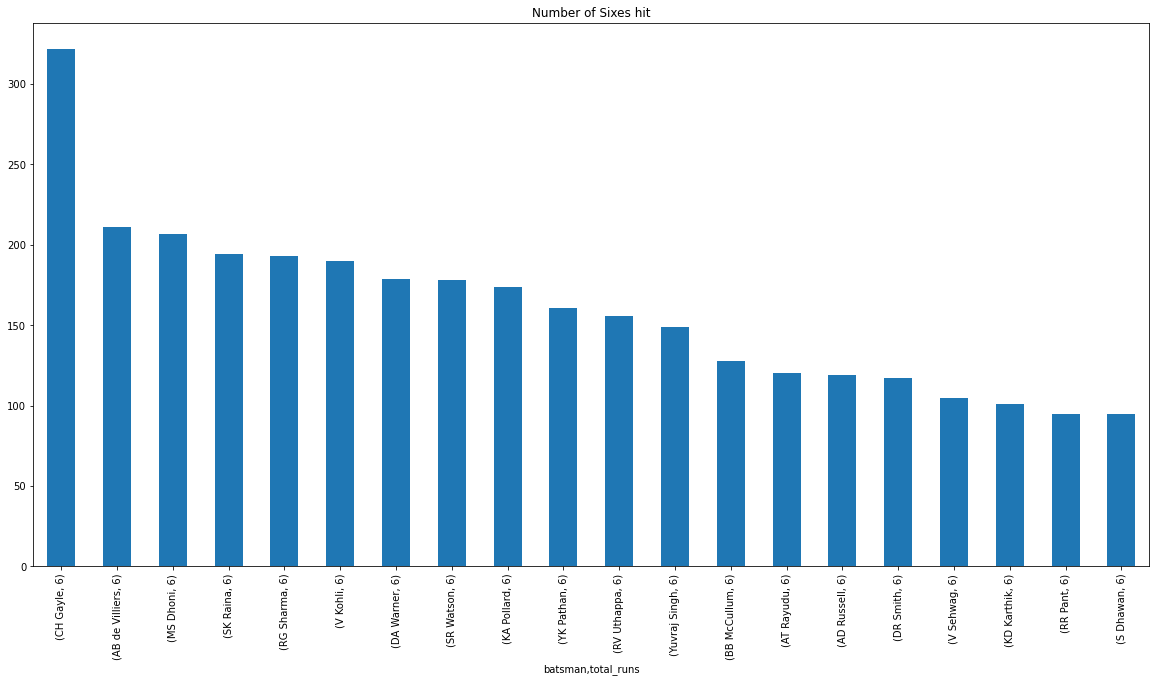

In [22]:
plt.figure(figsize=(20,10))
plt.title('Number of Sixes hit')
sixes=deliveries_data[deliveries_data.total_runs==6].groupby('batsman')
sixes.total_runs.value_counts().sort_values(ascending=False)[:20].plot(kind='bar')

# Most Number of Matches Hosting Venues

<AxesSubplot:title={'center':'Match Hosting Venues'}, ylabel='Number of Matches'>

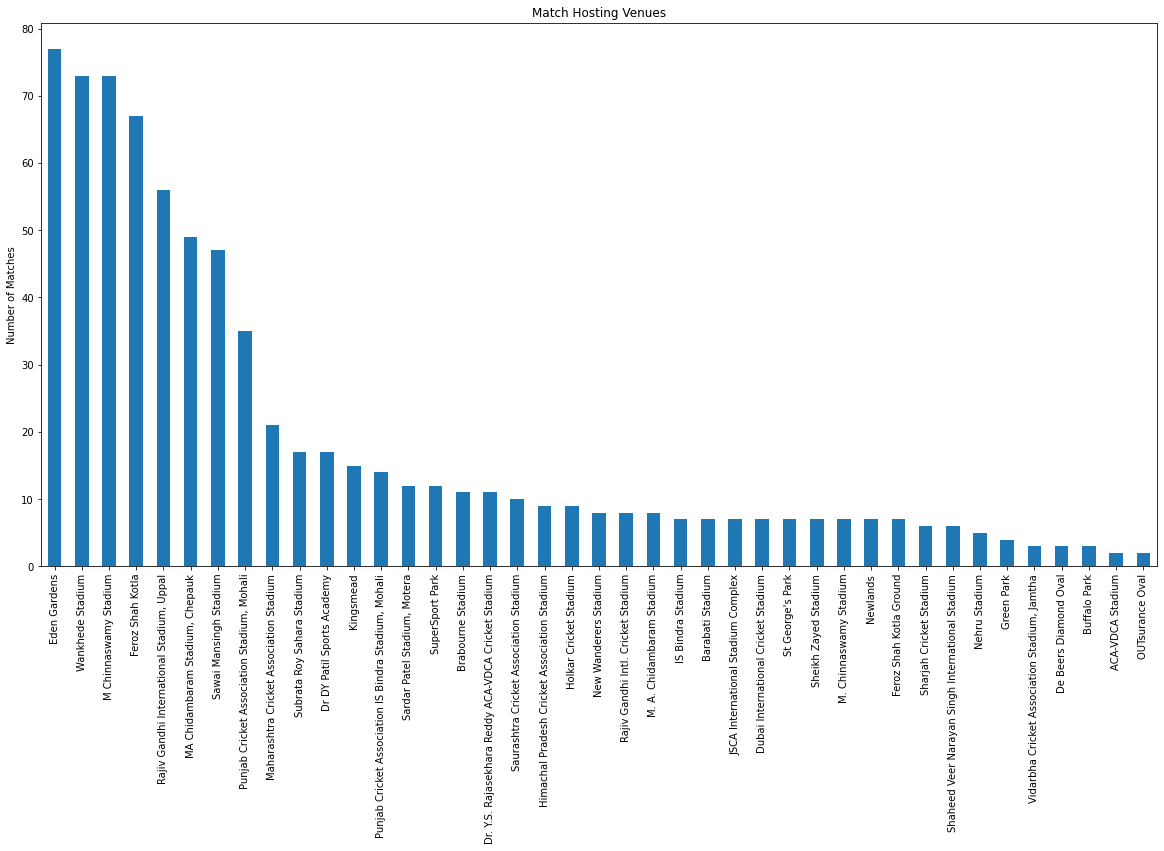

In [23]:
plt.figure(figsize=(20,10))
plt.title('Match Hosting Venues')
plt.ylabel('Number of Matches')
matches_data.venue.value_counts().plot(kind='bar')

# Most Number of Match Hosting Cities

<AxesSubplot:title={'center':'Match Hosting Cities'}, ylabel='Number of Matches'>

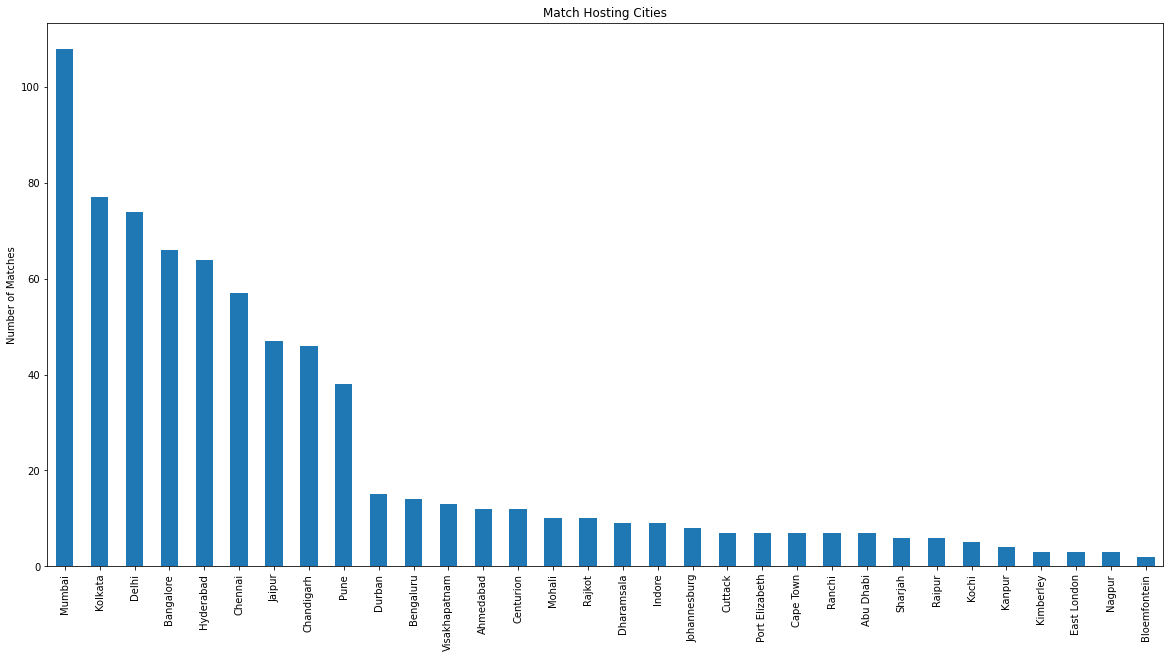

In [24]:
plt.figure(figsize=(20,10))
plt.title('Match Hosting Cities')
plt.ylabel('Number of Matches')
matches_data.city.value_counts().plot(kind='bar')

# Some Important Points Got

- 2013, 2012, and 2011 were the the years where most number of IPL matches played
- Mumbai Indians team won most number of matches
- Virat Kohli and SK Raina scored the most number of runs
- CH Gayle becomes 'Man of the Match' most of the time
- Most of the matches matches won by toss result
- S Dhawan was the Batsman who hits most Fours in the matches
- CH Gayle was the Batsman who hits most Sixes in the matches
- Most number of matches hosted in Eden Gardens Venue
- Most number of matches hosted in Mumbai City